(354, 13)
(152, 13)
(354,)
(152,)
Epoch 1 / 100
1/1 [================================] - loss:  89.23698721631713
                                         test:  40.730296052631275
Epoch 2 / 100
1/1 [================================] - loss:  60.14931628842285
                                         test:  29.1403947368417
Epoch 3 / 100
1/1 [================================] - loss:  45.605480824475706
                                         test:  23.34544407894691
Epoch 4 / 100
1/1 [================================] - loss:  36.87917954610742
                                         test:  19.868473684210038
Epoch 5 / 100
1/1 [================================] - loss:  31.06164536052855
                                         test:  17.550493421052124
Epoch 6 / 100
1/1 [================================] - loss:  26.90626379940078
                                         test:  15.894793233082336
Epoch 7 / 100
1/1 [================================] - loss:  23.789727628554953
     

1/1 [================================] - loss:  4.788910328881999
                                         test:  7.08219545840495
Epoch 62 / 100
1/1 [================================] - loss:  4.7442288067193354
                                         test:  7.064392230577207
Epoch 63 / 100
1/1 [================================] - loss:  4.700943582124254
                                         test:  7.047145353619079
Epoch 64 / 100
1/1 [================================] - loss:  4.658990210593637
                                         test:  7.030429149798126
Epoch 65 / 100
1/1 [================================] - loss:  4.618308153351827
                                         test:  7.01421949760811
Epoch 66 / 100
1/1 [================================] - loss:  4.578840485878429
                                         test:  6.998493715632722
Epoch 67 / 100
1/1 [================================] - loss:  4.540533632154248
                                         test:  6.983

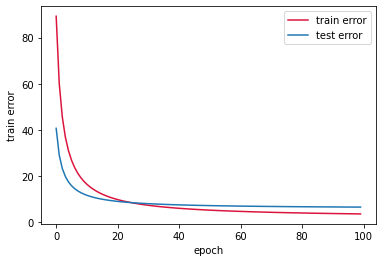

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

bos = load_boston() 
df = pd.DataFrame(bos.data) 
df.columns = bos.feature_names 
df['Price'] = bos.target 
data = df[df.columns[:-1]] 
data['Price'] = df.Price 

X = data.drop('Price', axis=1).to_numpy() 
y = data['Price'].to_numpy() 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

class boston_NN(object): #declaration of class
    def __init__(s): #s is the object
        s.bias=0.33
        s.input = 13 # feature numbers
        s.output = 1 # no.pf outputs
        s.hidden_perceptron = 2 # single layer and the number of preceptron in that layer
        s.train_err = list(range(354))
        s.test_err = list(range(152))
        s.train_plot = list(range(10))
        s.test_plot = list(range(10))
        np.random.seed(1) 
        # random weights: input -> hidden layer 
        s.Winput_Hidden = np.random.randn(s.input, s.hidden_perceptron) #13x2
        # random weights: hidden layer -> output
        s.Whidden_output = np.random.randn(s.hidden_perceptron, s.output) #2x1

    def relu(s,z):
        return np.maximum(0,z)
    def relu_grad(s,x):
        return x > 0

        
    def ForwardPass(s, X):

        s.netH = np.dot(s.Winput_Hidden.T, X) +s.bias #dot product of input to hidden layer
        s.outH = s.relu(s.netH)                       #activation           
        
        s.netO = np.dot(s.Whidden_output.T, s.outH) +s.bias #dot product of hidden to output layer
        s.outO = s.relu(s.netO)                             #activation
        
        return s.outO #return output
    
    def MSE(s, predict, y,m): #mean square error function
        loss = np.sum(pow(predict-y,2)) / m 
        return loss
  
    def Backward_Propagation(s,predict, X, y):
        #change in weight for hidden to output weights
        deltaoutO = predict - y #loss
        dnetO = np.multiply(deltaoutO, s.relu_grad(predict)) #loss*derivative of output
        s.dWhidden_output = np.sum(np.multiply(s.outH, dnetO)) #multiplied with the respective output of H  
  
        #change in weights for input to hidden
        deltaoutH = -deltaoutO*s.relu_grad(predict)*s.Whidden_output.T*s.relu_grad(s.outH) 
        #loss*derivative of output*weight*derivative of output on H*input
        s.dWinput_Hidden = np.sum(np.multiply(X, deltaoutH.T))
        
    def Weight_update(s,learning_rate=0.01):    
        #new weight= old weight + -lr*change in weight
        s.Winput_Hidden = s.Winput_Hidden - np.dot(learning_rate,s.dWinput_Hidden.T)
        s.Whidden_output = s.Whidden_output - np.dot(learning_rate,s.dWhidden_output)


                                   
if __name__=='__main__': #this is the main function
    i=1
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3) # split training data and testing data
    e=100 #no.of epochs
    net = boston_NN() #decalration of class object
    for epoch in range(e):
        for u in range(354): #for loop to pass single data point at a time
            output=net.ForwardPass(X[u]) #forward pass and value stored in variable output
            error=net.MSE(output,y[u],354)  #calculate error by passing output variable in function and Y
            net.Backward_Propagation(output,X[u],y[u]) #back propagation after calcualtion of error 
            net.Weight_update() #weight update 
            net.train_err.append(error) 
        avg = sum(net.train_err) / len(net.train_err) #average error of one epoch 
        net.train_plot.append(avg)
        for g in range(152): #to run the final weights of this epoch on test data
            output2=net.ForwardPass(X[u]) #one by one test data point passed in forward pass
            loss2 = net.MSE(output2,y[u],152) #test error
            net.test_err.append(loss2)
        avg2=sum(net.test_err)/len(net.test_err)
        net.test_plot.append(avg2)
        print("Epoch", i, "/",e)
        print("1/1 [================================] - loss: ", avg)
        print("                                         test: ", avg2)
        i = i + 1

    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    new_train=net.train_plot[10:] #train error of each spoch stored in train_plot
    new_test=net.test_plot[10:]   #t error of each epoch stored in test_plot
    x = new_train
    y = new_test
    def createList(n):
        lst = []
        for i in range(n):
            lst.append(i)
        return(lst)
    epochs=createList(e) #creating a list of no.of epochs

    sns.lineplot(x=epochs,y=x,color='crimson',label='train error') #plot no.of epochs on x-axis and train error on y-axis "red color"
    sns.lineplot(x=epochs,y=y,label='test error')                  #plot no.of epochs on y-axis and test error on y-axis
    plt.ylabel("train error")
    plt.xlabel("epoch")
    plt.show()

